In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
%matplotlib inline

In [5]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.2, random_state=0)

In [9]:
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


In [14]:
df = pd.DataFrame(data=X,columns=['a','b'])
df.head()

,a,b
0,0.242655,0.038320
1,0.044330,-0.056673
2,-0.786777,-0.757186
3,0.004067,0.131172
4,-0.164107,0.150650


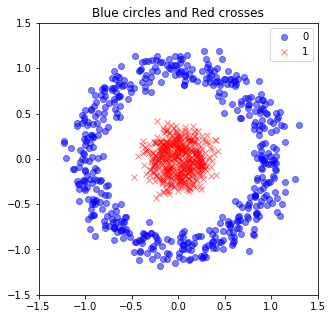

In [22]:
plt.figure(figsize=(5,5))
plt.plot(X[y==0, 0], X[y==0,1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1,1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend([0,1])
plt.title("Blue circles and Red crosses")

### Import Keras stuff above

In [25]:
model = Sequential()

In [26]:
model.add(Dense(4, input_shape=(2,), activation='tanh'))

In [27]:
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [29]:
model.fit(X, y, epochs=20)

Epoch 1/20
1000/1000 [==============================] - 0s - loss: 0.6637 - acc: 0.6420     
Epoch 2/20
1000/1000 [==============================] - 0s - loss: 0.5559 - acc: 0.8110     
Epoch 3/20
1000/1000 [==============================] - 0s - loss: 0.4353 - acc: 0.8800     
Epoch 4/20
1000/1000 [==============================] - 0s - loss: 0.3285 - acc: 0.9110     
Epoch 5/20
1000/1000 [==============================] - 0s - loss: 0.2332 - acc: 0.9780     
Epoch 6/20
1000/1000 [==============================] - 0s - loss: 0.1642 - acc: 1.0000     
Epoch 7/20
1000/1000 [==============================] - 0s - loss: 0.1227 - acc: 1.0000     
Epoch 8/20
1000/1000 [==============================] - 0s - loss: 0.0966 - acc: 1.0000     
Epoch 9/20
1000/1000 [==============================] - 0s - loss: 0.0794 - acc: 1.0000     
Epoch 10/20
1000/1000 [==============================] - 0s - loss: 0.0675 - acc: 1.0000     
Epoch 11/20
1000/1000 [==============================] - 0s - loss: 0

In [32]:
hticks = np.linspace(-1.5,1.5, 101)
vticks = np.linspace(-1.5,1.5, 101)
aa, bb, = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]
c = model.predict(ab)
cc = c.reshape(aa.shape)

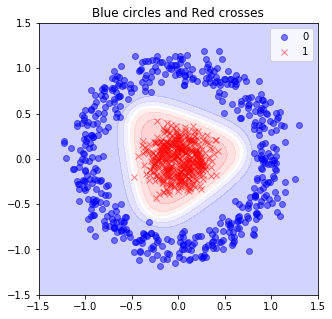

In [34]:
plt.figure(figsize=(5,5))
plt.contourf(aa,bb,cc,cmap='bwr',alpha=0.2)
plt.plot(X[y==0, 0], X[y==0,1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1,1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend([0,1])
plt.title("Blue circles and Red crosses")